## PORTFOLIO OPTIMIZATION

Here, I'll build two portfolios each with an intial investment of 10,000, distributed among 4 US stocks( Apple, Microsft, Advanced Micro Devices and Oracle) 
The second portfolio will make use of a weighting allocation gives  the best returns, adjusted for risk.

A high level summary for the steps to be followed include:
1. Import two years of data for four stocks
2. Build the initial portfolio with equal weighting to each of the stocks
3. Analyze and visualize the equal-weighted portfolio
4. Generate 10,000 portfolio scenarios with random weighting to each of the stocks
5. Identify the optimal portfolio from the scenarios and visualize the results


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_datareader
import pandas_datareader.data as pdr

In [2]:
# Set start and end date parameters
startdate = '2019-01-01'
enddate = '2022-10-17'

# List the four stock ticker symbols for our portfolio
stock_list = ['AMD', 'AAPL', 'MSFT', 'ORCL']

# Create an empty dictionary to store our stock info
stocks = {}

# Loop through each stock in the stock_list and return the Adj Close
for every_stock in stock_list:
    stocks[every_stock] = pdr.DataReader(every_stock, 'yahoo', startdate, enddate)[['Adj Close']]
    
print(stocks['AMD'].head())

            Adj Close
Date                 
2019-01-02  18.830000
2019-01-03  17.049999
2019-01-04  19.000000
2019-01-07  20.570000
2019-01-08  20.750000


To create the equal-weighted portfolio, I'll add some additional columns to the DataFrames in the stocks dictionary. The three columns that we will build are:

Normalized Return = Adjusted Close / Adjusted Close on the startdate of the portfolio
Allocation = Normalized Return * 0.25 (equal weighting for each of the four stocks)
Position Value = Allocation * 10,000 (value of the portfolio)

In [3]:
# Create 'Normalized Return' column for each stock
for stock_key, stock_value in stocks.items():
    first_adj_close = stock_value.iloc[0]['Adj Close'] # Select the first row from the Adj Close column
    stock_value['Normalized Return'] = stock_value['Adj Close'] / first_adj_close # Divide each row by the first Adj Close

stocks['AAPL'].head()

,Adj Close,Normalized Return
Date,,
2019-01-02,38.168346,1.000000
2019-01-03,34.366505,0.900393
2019-01-04,35.833580,0.938830
2019-01-07,35.753819,0.936740
2019-01-08,36.435390,0.954597


In [4]:
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_key, stock_value in stocks.items():
    stock_value['Allocation'] = stock_value['Normalized Return'] * 0.25

stocks['MSFT'].head()

,Adj Close,Normalized Return,Allocation
Date,,,
2019-01-02,97.147690,1.000000,0.250000
2019-01-03,93.573837,0.963212,0.240803
2019-01-04,97.925888,1.008010,0.252003
2019-01-07,98.050781,1.009296,0.252324
2019-01-08,98.761703,1.016614,0.254154


In [5]:
# Set the value of the portfolio to $10k
for stock_key, stock_value in stocks.items():
    stock_value['Position Value'] = stock_value['Allocation'] * 10000
    
stocks['ORCL'].head()

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2019-01-02,42.296154,1.000000,0.250000,2500.000000
2019-01-03,41.884602,0.990270,0.247567,2475.674359
2019-01-04,43.689808,1.032950,0.258237,2582.374740
2019-01-07,44.381958,1.049314,0.262329,2623.285677
2019-01-08,44.784172,1.058824,0.264706,2647.059354


## Visualize the Portfolio Performance

To visualize the performance of the portfolio, two line charts that show the return of the portfolio, and the return of the individual stocks, over time will be generated. 

We'll initialize a new DataFrame that contains just the position value for each stock, as well as the total value for the portfolio. This is the Dataframe that will be used to create the two charts.

In [6]:
# Create position_values dictionary
position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']
    
# Convert the position_values dictionary to a DataFrame
position_values = pd.DataFrame(data=position_values)

position_values.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000
2019-01-03,2263.674895,2250.982025,2408.030429,2475.674359
2019-01-04,2522.570377,2347.074434,2520.026164,2582.374740
2019-01-07,2731.014309,2341.850111,2523.240167,2623.285677
2019-01-08,2754.912385,2386.492598,2541.535050,2647.059354


In [7]:
# Add 'Total' column to position values, summing the other columns
position_values['Total'] = position_values.sum(axis=1)

position_values.head()

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2019-01-03,2263.674895,2250.982025,2408.030429,2475.674359,9398.361707
2019-01-04,2522.570377,2347.074434,2520.026164,2582.374740,9972.045715
2019-01-07,2731.014309,2341.850111,2523.240167,2623.285677,10219.390265
2019-01-08,2754.912385,2386.492598,2541.535050,2647.059354,10329.999388


Text(0, 0.5, 'Total Value')

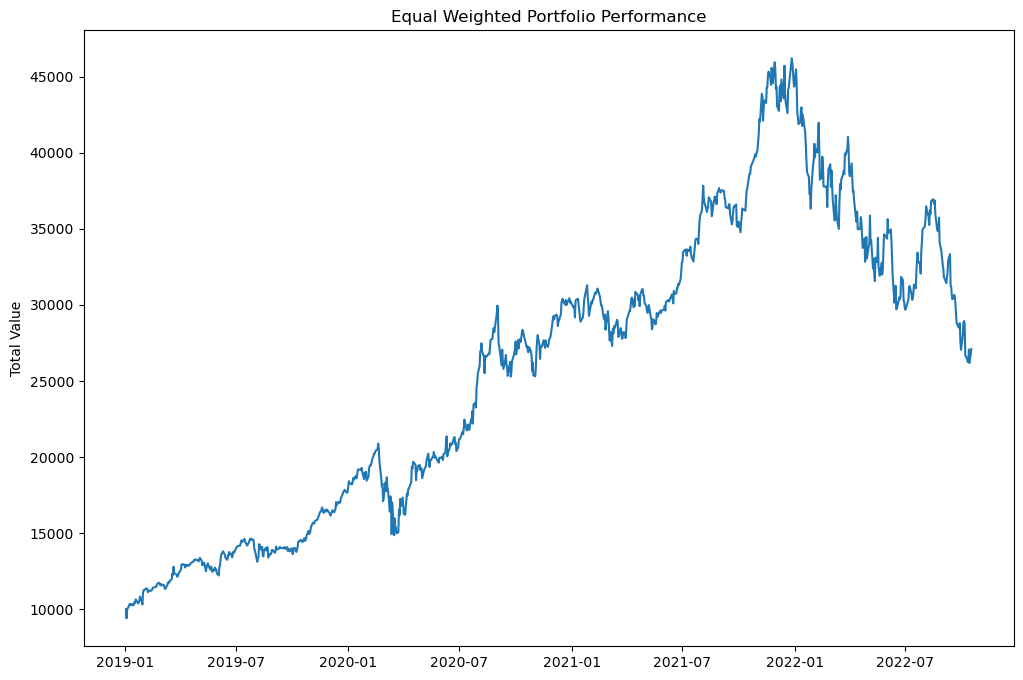

In [8]:
# We'll use the total column to visualize the performance of our portfolio over time.

plt.figure(figsize = (12,8))

plt.plot(position_values['Total'])

plt.title('Equal Weighted Portfolio Performance')

plt.ylabel('Total Value')

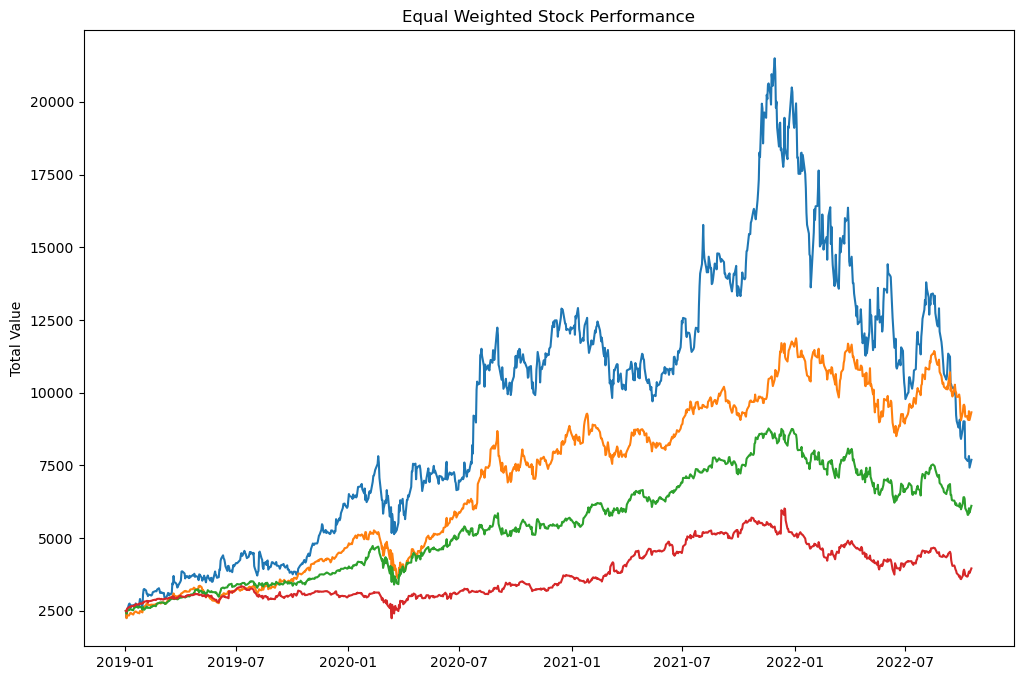

In [9]:
# We'll use the total column to visualize the performance of our portfolio over time.

plt.figure(figsize = (12,8))

plt.plot(position_values.iloc[:,0:4])

plt.title('Equal Weighted Stock Performance')

plt.ylabel('Total Value');

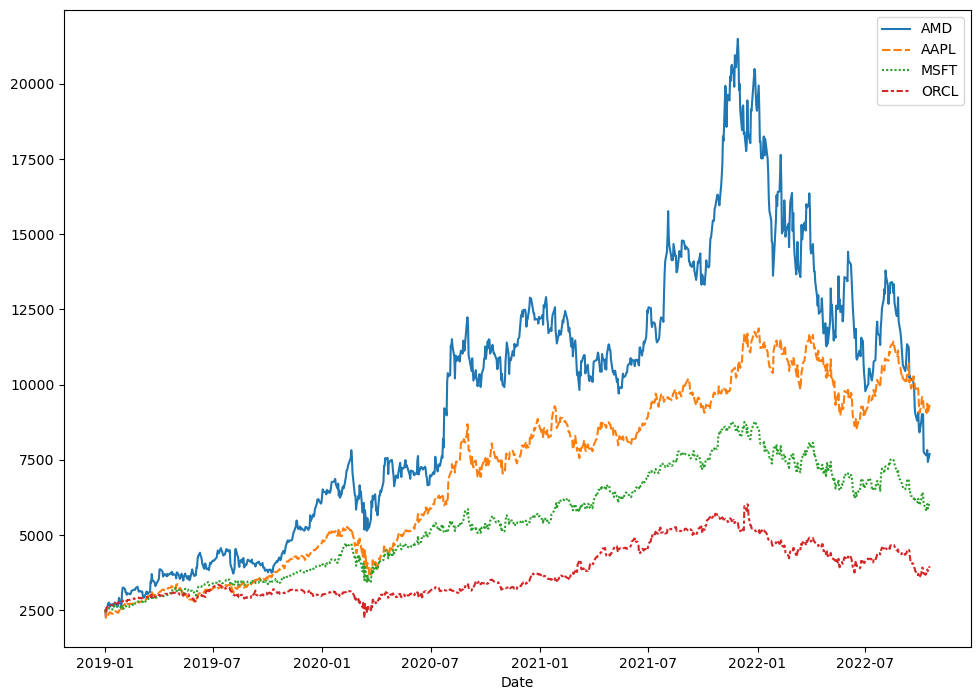

In [10]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.lineplot(data = position_values.iloc[:,0:4],ax = ax);

## Calculate Performance Metrics for the Portfolio

1. Cumulative Return = end value of portfolio/ start value of portfolio
2. Mean Daily Return
3. Standard Deviation Daily Return
4. Sharpe Ratio
5. Annualized Sharpe Ratio

In [11]:
#Cumulative Return

end_value = position_values['Total'][-1]
start_value = position_values['Total'][0]

cumulative_return = end_value/start_value - 1

print(str(round(cumulative_return*100,2)), '%')

170.97 %


In [12]:
# Daily Returns

position_values['Daily Returns'] = position_values['Total'].pct_change()
position_values.head()

,AMD,AAPL,MSFT,ORCL,Total,Daily Returns
Date,,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN
2019-01-03,2263.674895,2250.982025,2408.030429,2475.674359,9398.361707,-0.060164
2019-01-04,2522.570377,2347.074434,2520.026164,2582.374740,9972.045715,0.061041
2019-01-07,2731.014309,2341.850111,2523.240167,2623.285677,10219.390265,0.024804
2019-01-08,2754.912385,2386.492598,2541.535050,2647.059354,10329.999388,0.010823


In [13]:
# Mean Daily Returns

mean_daily_return = position_values['Daily Returns'].mean()

print('The mean daily return is:', str(round(mean_daily_return*100, 4)), '%')

The mean daily return is: 0.1281 %


In [14]:
# Calculate the standard deviation of Daily Return 
std_daily_return = position_values['Daily Returns'].std()

print('The standard deviation daily return is:', str(round(std_daily_return*100, 4)), '%')

The standard deviation daily return is: 2.1738 %


## Sharpe Ratio

This is a a risk-adjusted return metric.
The sharpe ratio helps us quantify how much return we are getting by a given level of risk. When comparing two different investments against the same benchmark, the asset with the higher Sharpe ratio provides a higher return for the same amount of risk or the same return for a lower risk than the other asset.

It is calculated by the average return of the portfolio minus a risk free rate (such as government bonds), divided by the standard deviation of the return. In this case, we assume the risk-free rate is close to zero, so we won't add it to the formula.

In [15]:
sharpe_ratio = mean_daily_return / std_daily_return

sharpe_ratio

0.058917322620883776

In [16]:
# Calculate the annualized sharpe ratio
sharpe_ratio_annualized = sharpe_ratio * 252**0.5

sharpe_ratio_annualized

0.9352835014117123

The Sharpe Ratio quantifies the tradeoff between risk and return and is used to analyze individual investments and compare investments to each other. In other words, the Sharpe Ratio measures returns per unit of volatility.

In our example, a Sharpe Ratio of 0.93 means investors can reasonably expect 0.93 units of return for every 1 unit of volatility. This is an inadequate risk/return profile.

## Sharpe Ratio – Drawbacks

Statistical analysis is never perfect and investors should be cautious when using the Sharpe Ratio to make investment decisions. 

First, although the Sharpe Ratio is often defined as measuring “risk-adjusted returns”, the Sharpe Ratio actually measures volatility of returns, not necessarily “risk”. For example, an investment with no drawdowns might have a lower Sharpe Ratio than another investment that has had several losing months. The reason is that the Sharpe Ratio calculation penalizes volatility; if the first investment has never had loss but returns are volatile, the Sharpe Ratio will be lower than an investment with more consistent returns. 

Second, past performance does not guarantee future results. Even though an investment may have a high Sharpe Ratio, that does not guarantee consistent returns (low volatility) going forward. The Sharpe Ratio analyzes past performance and historical volatility. The Sharpe Ratio provides a reasonable expectation of what to expect going forward, but the future will always be uncertain and future performance can be (and often is) different than past performance. 

## Prepare Scenarios to Optimize Portfolio Weighting

1. Create a dictionary containing the adjusted close for each of our stocks: stock_adj_close
2. Create another dictionary that transforms the adjusted close for each day to a percent change from the previous day

In [17]:
# Create stock_adj_close dictionary
stock_adj_close = {}

for stock_name, stock_data in stocks.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']

# Convert the stock_adj_close dictionary to a DataFrame
stock_adj_close = pd.DataFrame(data=stock_adj_close)

stock_adj_close.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,18.830000,38.168346,97.147690,42.296154
2019-01-03,17.049999,34.366505,93.573837,41.884602
2019-01-04,19.000000,35.833580,97.925888,43.689808
2019-01-07,20.570000,35.753819,98.050781,44.381958
2019-01-08,20.750000,36.435390,98.761703,44.784172


In [18]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

stock_returns.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.094530,-0.099607,-0.036788,-0.009730
2019-01-04,0.114370,0.042689,0.046509,0.043100
2019-01-07,0.082632,-0.002226,0.001275,0.015842
2019-01-08,0.008751,0.019063,0.007251,0.009063


## Build & Run 10,000 Portfolio Scenarios

First, we need to build the structures required to generate these scenarios and store the output by using the numpy.zeros() function.This function creates arrays that are filled with zeros. After running the scenarios, these zeros are replaced with the corresponding output. The reason for creating the arrays with zeros first is to give the arrays the correct shape before replacing them with the correct values.

Four different arrays will be created:

weights_array - this array will have 10,000 rows and 4 columns and hold the weighting allocation for each stock
returns_array - this array will contain the portfolio return for each scenario
volatility_array - this array will contain the portfolio volatility for each scenario
sharpe_array - this array will contain the sharpe ratio for each scenario

In [19]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(stock_returns.columns))) #10,000 rows and 4 columns

# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [20]:
import random
random.seed(3)
np.random.seed(3)

for index in range(scenarios): 
    # Generate four random numbers for each index
    numbers = np.array(np.random.random(4))
    
    # Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)
    
    # Save the weights in weights_array
    weights_array[index,:] = weights
    
    # Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

    # Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [21]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: 1.0568844780568605


## Identify the Optimal Portfolio

In [22]:
sharpe_array.max()

1.1897597164453377

In [23]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

1287

In [24]:
# Print the optimal weights for each stock
print(stock_list)
print(weights_array[index_max_sharpe,:])

['AMD', 'AAPL', 'MSFT', 'ORCL']
[0.0502414  0.8895273  0.04857727 0.01165403]


## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize our portfolio scenarios by using a scatter chart. We can use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, we can visualize where the optimal portfolio appears among all of the scenarios.

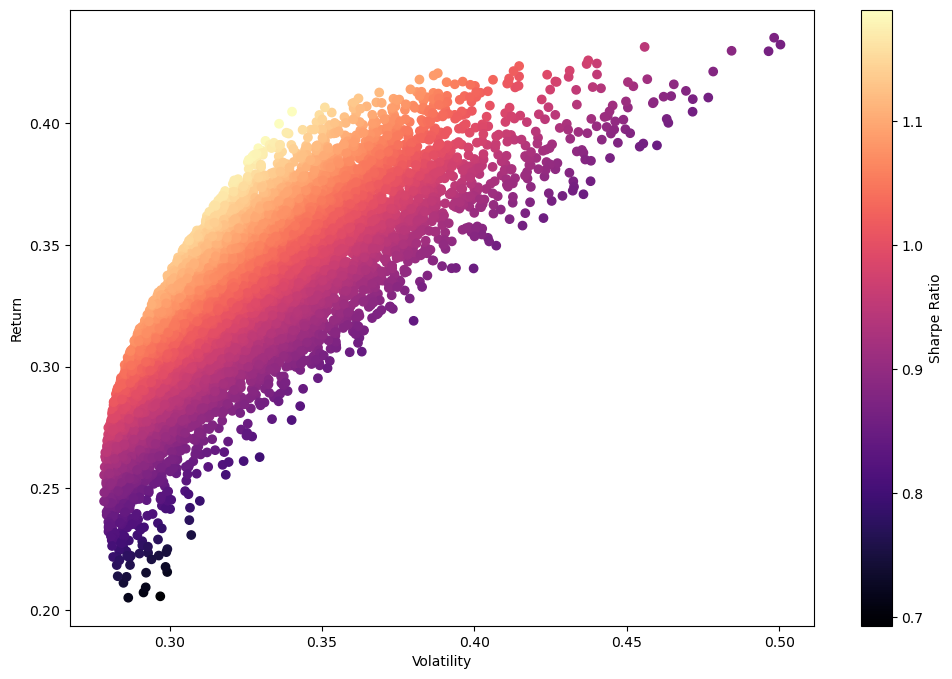

In [25]:
# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='magma')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

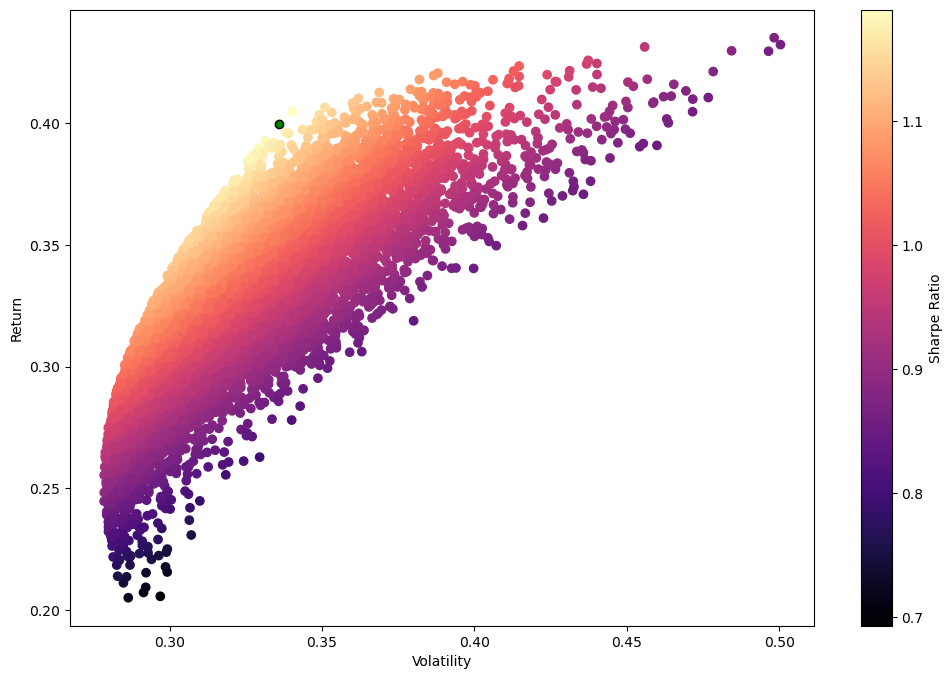

In [26]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='magma')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add the optimal portfolio to the visual
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='green', edgecolors='black');

## Summary

In our analysis of the financial data from 2019 upto the most recent stock price update from yahoo finance, 17/10/2022, This is our conclusion.

The green data point on our graph is the the optimal scenario out of the 10,000 run that provides the highest return with the lowest volatility in our portfolio. 

The optimal Sharpe Ratio is 1.18975 and Optimal Portfolio Allocation is 88.952% for Apple, 5.024% for Advanced Micro Devices, 4.857% for Microsoft and 1.165% for Amazon. I would conclude to substitute IMB shares to something more profitable.